# 导入常用库

In [11]:
import os
import shutil
import cv2
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random
from PIL import Image
import pandas as pd
import joblib
import open3d as o3d
import matplotlib.ticker as ticker
import time

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [8]:
o3d.__version__

'0.16.0'

# 数据增强

In [ ]:
imglist=os.listdir(r'inputs/resized_tree_dataset_960/images')
print(len(imglist))

In [ ]:
depthlist=os.listdir(r'inputs/resized_tree_dataset_960/norm_depth')
print(len(depthlist))

In [ ]:
masklist=os.listdir(r'inputs/resized_tree_dataset_960/masks/0')
print(len(masklist))

In [79]:
imgpath=r'inputs/tree512/images'
depthpath=r'inputs/tree512/norm_depth'
maskpath=r'inputs/tree512/masks/0'

## 重命名文件

In [ ]:
# cnt=1
# filelist=os.listdir(imgpath)
# filelist.sort(key=lambda x:int(x[:-4]))
# for file in filelist:
#   newname=str(cnt)+'.png'
#   os.rename(os.path.join(imgpath,file),os.path.join(imgpath,newname))
#   os.rename(os.path.join(depthpath,file),os.path.join(depthpath,newname))
#   os.rename(os.path.join(maskpath,file),os.path.join(maskpath,newname))
#   cnt+=1

In [80]:
filelist=os.listdir(maskpath)
filelist.sort(key=lambda x:int(x[:-4]))
print(filelist[-5:])

['1496.png', '1497.png', '1498.png', '1499.png', '1500.png']


## 确认数据和标注对得上

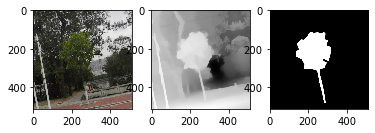

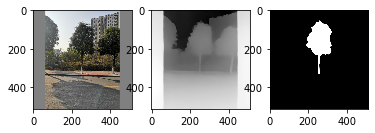

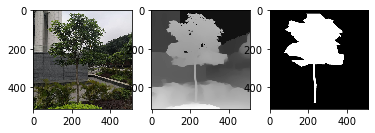

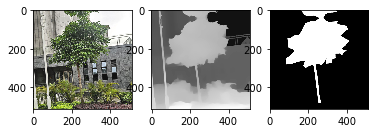

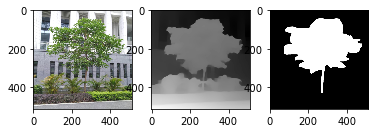

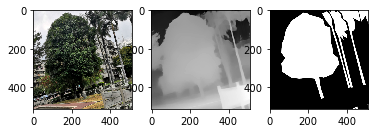

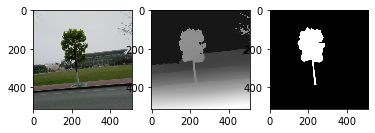

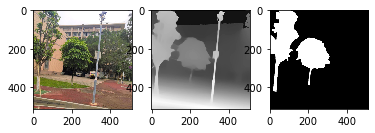

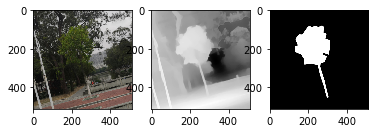

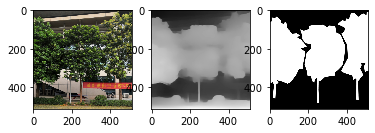

In [83]:
imglist=os.listdir(imgpath)
random.shuffle(imglist)
cnt=0
for file in imglist:
  plt.figure()

  img = cv2.imread(os.path.join(imgpath,file))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.subplot(1, 3, 1)
  plt.imshow(img)
  # plt.title(file)

  img = cv2.imread(os.path.join(depthpath,file),0)
  plt.subplot(1, 3, 2)
  plt.imshow(img,cmap='gray')
  # plt.title("depth")

  img = cv2.imread(os.path.join(maskpath,file),0)
  plt.subplot(1, 3, 3)
  plt.imshow(img,cmap='gray')
  # plt.title("original")
  cnt+=1
  if cnt==10:
    break

# BGR2RGB

In [ ]:
img=cv2.imread(r"inputs\resized_tree_dataset_960\images\311.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
cv2.imwrite("test.png",img)

In [ ]:
path=r"inputs\resized_tree_dataset_960\images"
outpath=r"inputs\resized_tree_dataset_960\new_images"
for i in range(311,995):
    img=cv2.imread(os.path.join(path,str(i)+'.png'))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plt.imshow(img)
    cv2.imwrite(os.path.join(outpath,str(i)+'.png'),img)

## 正则化深度图

In [ ]:
path_main = "new_depth" # 待处理文件夹路径
file_list = os.listdir(path_main)                   
path_receive = "new_norm_depth"  # 目标路径
for file in file_list:
  img=cv2.imread(os.path.join(path_main,file),0)
  cv2.imwrite(os.path.join(path_receive,file),img)

## 用一张图确定增强方法

In [84]:
import albumentations as A
from albumentations.core.composition import Compose, OneOf

d:\Anaconda3-new\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
d:\Anaconda3-new\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np

In [85]:
transform = A.Compose([ #图像增强
        A.HorizontalFlip(),
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2,brightness_by_max=False,p=1),
        A.ShiftScaleRotate(rotate_limit=15),
        # transforms.Normalize(),#数据标准化，即均值为0，标准差为1。
    ])

In [86]:
imgpath=r'inputs/tree512/images'
depthpath=r'inputs/tree512/norm_depth'
maskpath=r'inputs/tree512/masks/0'

In [87]:
image=Image.open(os.path.join(imgpath,"994.png"))
mask = Image.open(os.path.join(maskpath,'994.png'))
depth = Image.open(os.path.join(depthpath,"994.png"))

In [88]:
image=np.asarray(image)
depth=np.asarray(depth)
mask=np.asarray(mask)

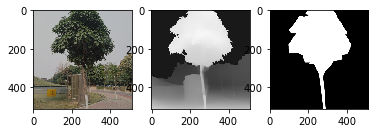

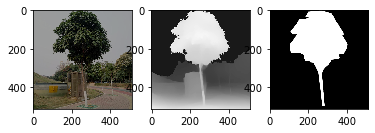

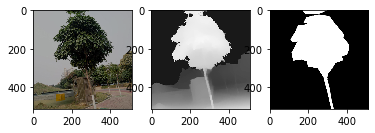

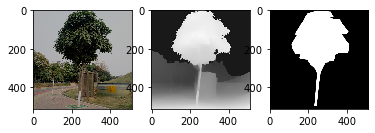

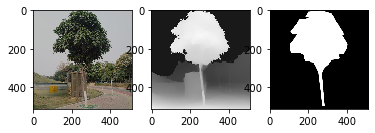

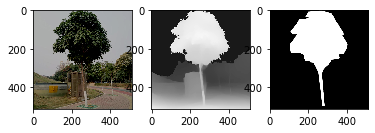

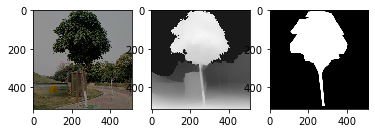

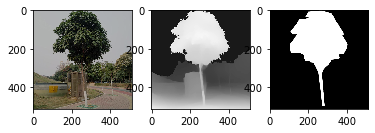

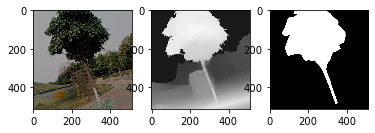

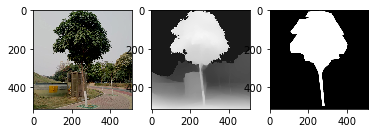

In [89]:
masks = [mask,depth]

for i in range(10):
  transformed = transform(image=image, masks=masks)
  transformed_image = transformed['image']
  transformed_mask = transformed['masks'][0]
  transformed_depth = transformed['masks'][1]

  plt.figure()
  plt.subplot(1, 3, 1)
  plt.imshow(transformed_image)
  # plt.title("original")

  plt.subplot(1, 3, 2)
  plt.imshow(transformed_depth,cmap='gray')
  # plt.title("depth")

  plt.subplot(1, 3, 3)
  plt.imshow(transformed_mask,cmap='gray')

## 将数据集由312张扩展到1000张

In [ ]:
cnt=1061
num=995
while num<=1060:
  newname=str(cnt)+'.png'
  name=str(num)+'.png'
  
  image=Image.open(os.path.join(imgpath,name))
  image=np.asarray(image)

  mask = cv2.imread(os.path.join(maskpath,name),0)

  depth = cv2.imread(os.path.join(depthpath,name),0)

  masks = [mask,depth]

  transformed = transform(image=image, masks=masks)
  
  transformed_image = transformed['image']
  transformed_image=Image.fromarray(transformed_image)
  transformed_image.save(os.path.join(imgpath,newname))
  # cv2.imwrite(os.path.join(imgpath,newname),transformed_image)
  
  transformed_mask = transformed['masks'][0]
  cv2.imwrite(os.path.join(maskpath,newname),transformed_mask)
  transformed_depth = transformed['masks'][1]
  cv2.imwrite(os.path.join(depthpath,newname),transformed_depth)
  cnt+=1
  num+=1
  if num==1060 and cnt<=1500:
    num=995
  if cnt==1501:
    break

# 将mask的红色改为白色

In [ ]:
mask_path = 'inputs/resized_tree_dataset_960/red_masks/0'
maskList = os.listdir(mask_path)
save_path = 'inputs/resized_tree_dataset_960/masks/0'
if not os.path.exists(save_path):
    os.makedirs(save_path)    
for mask in maskList:
  # 读取灰度图像
  img = (cv2.imread(os.path.join(mask_path,mask), 0))
  # 1.全局阈值法
  ret, mask_all = cv2.threshold(src=img,# 要二值化的图片
        thresh=37,               # 全局阈值
        maxval=255,               # 大于全局阈值后设定的值
        type=cv2.THRESH_BINARY)   # 设定的二值化类型，THRESH_BINARY：表示小于阈值置0，大于阈值置填充色
  cv2.imwrite(os.path.join(save_path,mask),mask_all)

In [ ]:
def compare_segmentation(fileName,predPath,predPath_old):
  plt.figure(figsize=(10,10))#创建新画布

  #原始图像
  img = cv2.imread("inputs/augmented_dataset_256/images/"+fileName[:-4]+'.png')
  plt.subplot(1, 4, 1)
  plt.imshow(img)
  plt.title("original")

  #mask
  img = cv2.imread("inputs/augmented_dataset_256/masks/0/"+fileName[:-4]+'.png')
  plt.subplot(1, 4, 2)
  plt.imshow(img)
  plt.title("Ground Truth")

  # 读取灰度图像
  img = cv2.imread(predPath_old+fileName, 0)
  # plt.subplot(1, 4, 3)
  # plt.imshow(img, cmap='gray')
  # plt.title("Prediction")

  # 3.OTSU二值化
  ret2, mask_OTSU = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  plt.subplot(1, 4, 3)
  plt.imshow(mask_OTSU, cmap='gray')
  plt.title("old pred")

  # 读取灰度图像
  img = cv2.imread(predPath+fileName, 0)
  # plt.subplot(1, 4, 3)
  # plt.imshow(img, cmap='gray')
  # plt.title("Prediction")

  # 3.OTSU二值化
  ret2, mask_OTSU = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  plt.subplot(1, 4, 4)
  plt.imshow(mask_OTSU, cmap='gray')
  plt.title("new pred")


## 之前训练过NestedUNet，即UNet++

In [ ]:
modelPath='augmented_dataset_256_NestedUNet_woDS2022-11-21_03:28:15.396746'
modelPath_old='augmented_dataset_256_NestedUNet_woDS2022-11-12_05:39:12.704984'

In [ ]:
predPath='outputs/'+modelPath+'/0/'
predPath_old='outputs/'+modelPath_old+'/0/'
fileList=os.listdir(predPath)
fileList_old=os.listdir(predPath_old)
# print(len(fileList))
# print(fileList[:5])
random.shuffle(fileList)
# print(fileList[:5])
cnt=0
for file in fileList:
  if file in fileList_old:
    print(file)
    show_segmentation(file,predPath,predPath_old)
    cnt+=1
    if cnt==8:
      break

In [ ]:
modelPath='augmented_dataset_256_NestedUNet_woDS2022-11-12_05:39:12.704984'

In [ ]:
file_path='models/'+modelPath+'/log.csv'
log_data=pd.read_csv(file_path)

In [ ]:
train_loss=np.array(log_data['loss'])
train_iou=np.array(log_data['iou'])
train_acc=np.array(log_data['acc'])

val_loss=np.array(log_data['val_loss'])
val_iou=np.array(log_data['val_iou'])
val_acc=np.array(log_data['val_acc'])

In [ ]:
epoch=np.array([i for i in range(len(train_loss))])
print(len(epoch))

In [ ]:
plt.figure()
plt.plot(epoch[:200],train_loss[:200],label=u'train loss')
plt.plot(epoch[:200],val_loss[:200],label=u'validation loss')
plt.legend()  # 让图例生效
# plt.xticks(10，label)
plt.xlabel('Epoch')
plt.title('Loss')
plt.savefig('models/'+modelPath+'/loss.png', dpi=300)

In [ ]:
plt.figure()
plt.plot(epoch[:200],train_iou[:200],label=u'train mIoU')
plt.plot(epoch[:200],val_iou[:200],label=u'validation mIoU')
plt.legend()  # 让图例生效
plt.xlabel('Epoch')
plt.title('mIoU')
plt.savefig('models/'+modelPath+'/mIoU.png', dpi=300)

In [ ]:
plt.figure()
plt.plot(epoch[:200],train_acc[:200],label=u'train accuracy')
plt.plot(epoch[:200],val_acc[:200],label=u'validation accuracy')
plt.legend()  # 让图例生效
plt.xlabel('Epoch')
plt.title('Pixel Accuracy')
plt.savefig('models/'+modelPath+'/acc.png', dpi=300)

In [ ]:
modelPath1='augmented_dataset_256_NestedUNet_woDS2022-11-21_03:28:15.396746'
file_path1='models/'+modelPath1+'/log.csv'
log_data1=pd.read_csv(file_path1)
train_loss1=np.array(log_data1['loss'])
train_iou1=np.array(log_data1['iou'])
train_acc1=np.array(log_data1['acc'])

val_loss1=np.array(log_data1['val_loss'])
val_iou1=np.array(log_data1['val_iou'])
val_acc1=np.array(log_data1['acc'])

In [ ]:
plt.figure()
plt.plot(epoch[:200],val_loss[:200],label=u'5 Layers UNet++')
plt.plot(epoch[:200],val_loss1[:200],label=u'4 Layers UNet++')
plt.legend()  # 让图例生效
# plt.xticks(10，label)
plt.xlabel('Epoch')
plt.title('Loss')

# Attention UNet

In [ ]:
!python train.py --dataset augmented_dataset_512 --arch AttentionUNet --img_ext .png --mask_ext .png --epochs 200 --batch_size 4 --input_w 512 --input_h 512 --deep_supervision False --nesterov True --early_stopping 15

In [ ]:
!python val.py --name augmented_dataset_512_AttentionUNet_woDS2023-02-23_03:17:45.218872

In [115]:
modelPath='augmented_dataset_256_NestedUNet_woDS2022-11-12_05_39_12.704984'

In [117]:
file_path='models/'+modelPath+'/log.csv'
log_data=pd.read_csv(file_path)

In [118]:
train_loss=np.array(log_data['loss'])
train_iou=np.array(log_data['iou'])
train_acc=np.array(log_data['acc'])

val_loss=np.array(log_data['val_loss'])
val_iou=np.array(log_data['val_iou'])
val_acc=np.array(log_data['val_acc'])

In [119]:
epoch=np.array([i for i in range(len(train_loss))])
print(len(epoch))

300


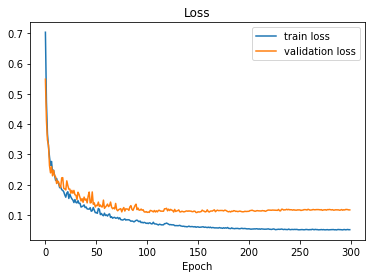

In [121]:
plt.figure()
plt.plot(epoch,train_loss,label=u'train loss')
plt.plot(epoch,val_loss,label=u'validation loss')
plt.legend()  # 让图例生效
# plt.xticks(10，label)
plt.xlabel('Epoch')
plt.title('Loss')
plt.savefig('models/'+modelPath+'/loss.png', dpi=300)

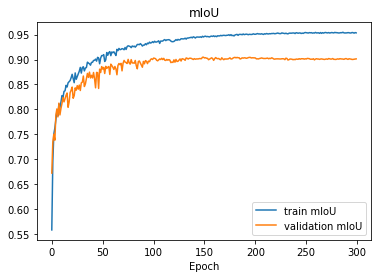

In [122]:
plt.figure()
plt.plot(epoch,train_iou,label=u'train mIoU')
plt.plot(epoch,val_iou,label=u'validation mIoU')
plt.legend()  # 让图例生效
plt.xlabel('Epoch')
plt.title('mIoU')
plt.savefig('models/'+modelPath+'/mIoU.png', dpi=300)

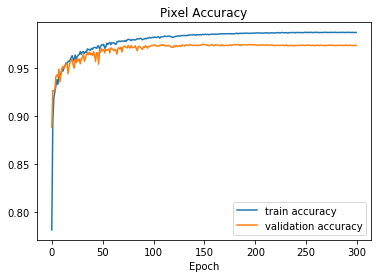

In [123]:
plt.figure()
plt.plot(epoch,train_acc,label=u'train accuracy')
plt.plot(epoch,val_acc,label=u'validation accuracy')
plt.legend()  # 让图例生效
plt.xlabel('Epoch')
plt.title('Pixel Accuracy')
plt.savefig('models/'+modelPath+'/acc.png', dpi=300)

# 常用函数

In [ ]:
def show_segmentation(fileName,predPath):
  plt.figure(figsize=(10,10))#创建新画布

  #原始图像
  img = cv2.imread("inputs/augmented_dataset_512/images/"+fileName[:-4]+'.png')
  plt.subplot(1, 3, 1)
  plt.imshow(img)
  plt.title("original")

  #mask
  img = cv2.imread("inputs/augmented_dataset_512/masks/0/"+fileName[:-4]+'.png')
  plt.subplot(1, 3, 2)
  plt.imshow(img)
  plt.title("Ground Truth")

  # 读取灰度图像
  img = cv2.imread(predPath+fileName, 0)

  # 3.OTSU二值化
  # ret2, mask_OTSU = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  plt.subplot(1, 3, 3)
  # plt.imshow(mask_OTSU, cmap='gray')
  plt.imshow(img, cmap='gray')
  plt.title("pred")


In [ ]:
predPath='outputs/'+modelPath+'/0/'
fileList=os.listdir(predPath)
# print(len(fileList))
# print(fileList[:5])
random.shuffle(fileList)
# print(fileList[:5])
cnt=0
for file in fileList:
  show_segmentation(file,predPath)
  cnt+=1
  if cnt==8:
    break

In [ ]:
modelPath_old='augmented_dataset_256_NestedUNet_woDS2022-11-21_03:28:15.396746'
predPath='outputs/'+modelPath+'/0/'
predPath_old='outputs/'+modelPath_old+'/0/'
fileList=os.listdir(predPath)
fileList_old=os.listdir(predPath_old)
# print(len(fileList))
# print(fileList[:5])
random.shuffle(fileList)
# print(fileList[:5])
cnt=0
for file in fileList:
  if file in fileList_old:
    print(file)
    compare_segmentation(file,predPath,predPath_old)
    cnt+=1
    if cnt==8:
      break

# DepthAttUNet

## 特征融合作用在编码解码阶段

In [ ]:
!python train.py --dataset augmented_dataset_512 --arch DepthAttentionUNet --img_ext .png --depth_ext .png --mask_ext .png --epochs 10 --batch_size 4 --input_w 512 --input_h 512 --deep_supervision False --nesterov True 
#--early_stopping 15

In [ ]:
!python val.py --name augmented_dataset_512_DepthAttentionUNet_woDS2023-03-07_02:51:48.467873

In [125]:
!python val.py --name augmented_dataset_256_NestedUNet_woDS2022-11-12_05_39_12.704984

In [2]:
modelPath='augmented_dataset_512_DepthAttentionUNet_woDS2023-03-07_02:51:48.467873'

In [ ]:
file_path='models/'+modelPath_both+'/log.csv'
log_data=pd.read_csv(file_path)

In [ ]:
train_loss=np.array(log_data['loss'])
train_iou=np.array(log_data['iou'])
train_acc=np.array(log_data['acc'])

val_loss=np.array(log_data['val_loss'])
val_iou=np.array(log_data['val_iou'])
val_acc=np.array(log_data['val_acc'])

In [ ]:
epoch=np.array([i for i in range(len(train_loss))])
print(len(epoch))

In [ ]:
plt.figure()
plt.plot(epoch,train_loss,label=u'train loss')
plt.plot(epoch,val_loss,label=u'validation loss')
plt.legend()  # 让图例生效
# plt.xticks(10，label)
plt.xlabel('Epoch')
plt.title('Loss')
plt.savefig('models/'+modelPath+'/loss.png', dpi=300)

In [ ]:
plt.figure()
plt.plot(epoch,train_iou,label=u'train mIoU')
plt.plot(epoch,val_iou,label=u'validation mIoU')
plt.legend()  # 让图例生效
plt.xlabel('Epoch')
plt.title('mIoU')
plt.savefig('models/'+modelPath+'/mIoU.png', dpi=300)

In [ ]:
plt.figure()
plt.plot(epoch,train_acc,label=u'train accuracy')
plt.plot(epoch,val_acc,label=u'validation accuracy')
plt.legend()  # 让图例生效
plt.xlabel('Epoch')
plt.title('Pixel Accuracy')
plt.savefig('models/'+modelPath+'/acc.png', dpi=300)

In [ ]:
import random
import os

In [ ]:
predPath='outputs/'+modelPath+'/0/'
fileList=os.listdir(predPath)
# print(len(fileList))
# print(fileList[:5])
random.shuffle(fileList)
# print(fileList[:5])
cnt=0
for file in fileList:
  show_segmentation(file,predPath)
  cnt+=1
  if cnt==8:
    break

## 融合仅作用在编码阶段

In [ ]:
!python train.py --dataset augmented_dataset_512 --arch DepthAttentionUNet --img_ext .png --depth_ext .png --mask_ext .png --epochs 10 --batch_size 4 --input_w 512 --input_h 512 --deep_supervision False --nesterov True 
#--early_stopping 15

In [ ]:
!python val.py --name augmented_dataset_512_DepthAttentionUNet_woDS2023-03-07_03:17:22.088152

In [ ]:
modelPath='augmented_dataset_512_DepthAttentionUNet_woDS2023-03-07_03:17:22.088152'

In [ ]:
predPath='outputs/'+modelPath+'/0/'
fileList=os.listdir(predPath)
# print(len(fileList))
# print(fileList[:5])
random.shuffle(fileList)
# print(fileList[:5])
cnt=0
for file in fileList:
  show_segmentation(file,predPath)
  cnt+=1
  if cnt==10:
    break

## 融合仅作用在解码阶段

### 10 epoches

In [ ]:
!python train.py --dataset augmented_dataset_512 --arch DepthAttentionUNet --img_ext .png --depth_ext .png --mask_ext .png --epochs 10 --batch_size 4 --input_w 512 --input_h 512 --deep_supervision False --nesterov True 
#--early_stopping 15

In [ ]:
!python val.py --name augmented_dataset_512_DepthAttentionUNet_woDS2023-03-07_03:42:30.269470

In [ ]:
modelPath='augmented_dataset_512_DepthAttentionUNet_woDS2023-03-07_03:42:30.269470'

In [ ]:
predPath='outputs/'+modelPath+'/0/'
fileList=os.listdir(predPath)
# print(len(fileList))
# print(fileList[:5])
random.shuffle(fileList)
# print(fileList[:5])
cnt=0
for file in fileList:
  print(file)
  show_segmentation(file,predPath)
  cnt+=1
  if cnt==2:
    break

### 200 epoches SGD+Nesterov动量 学习率衰减：CosineAnnealingLR



In [ ]:
!python train.py --dataset augmented_dataset_512 --arch DepthAttentionUNet --img_ext .png --depth_ext .png --mask_ext .png --epochs 200 --batch_size 4 --input_w 512 --input_h 512 --deep_supervision False --nesterov True 
#--early_stopping 15

训练一半断了

In [ ]:
!python train.py --dataset augmented_dataset_512 --arch DepthAttentionUNet --img_ext .png --depth_ext .png --mask_ext .png --epochs 200 --batch_size 4 --input_w 512 --input_h 512 --deep_supervision False --nesterov True 
#--early_stopping 15

In [ ]:
!python val.py --name augmented_dataset_512_DepthAttentionUNet_woDS2023-03-07_10:42:03.396459

In [ ]:
predPath='outputs/'+modelPath+'/0/'
fileList=os.listdir(predPath)
# print(len(fileList))
# print(fileList[:5])
random.shuffle(fileList)
# print(fileList[:5])
cnt=0
for file in fileList:
  show_segmentation(file,predPath)
  cnt+=1
  if cnt==10:
    break

In [ ]:
modelPath1='augmented_dataset_512_DepthAttentionUNet_woDS2023-03-07_07:45:04.466323'

In [ ]:
modelPath2='augmented_dataset_512_DepthAttentionUNet_woDS2023-03-07_10:42:03.396459'

In [ ]:
file_path1='models/'+modelPath1+'/log.csv'
log_data1=pd.read_csv(file_path1)
file_path2='models/'+modelPath2+'/log.csv'
log_data2=pd.read_csv(file_path2)

In [ ]:
train_loss1=np.array(log_data1['loss'])
train_iou1=np.array(log_data1['iou'])
train_acc1=np.array(log_data1['acc'])

val_loss1=np.array(log_data1['val_loss'])
val_iou1=np.array(log_data1['val_iou'])
val_acc1=np.array(log_data1['val_acc'])

In [ ]:
train_loss2=np.array(log_data2['loss'])
train_iou2=np.array(log_data2['iou'])
train_acc2=np.array(log_data2['acc'])

val_loss2=np.array(log_data2['val_loss'])
val_iou2=np.array(log_data2['val_iou'])
val_acc2=np.array(log_data2['val_acc'])

In [ ]:
epoch=np.array([i for i in range(len(train_loss1))])
print(len(epoch))

0-108 epoch

In [ ]:
epoch=np.array([i for i in range(len(train_loss2))])
print(len(epoch))

95-199 epoch

In [ ]:
train_loss=np.concatenate([train_loss1[:95],train_loss2],axis=0)

In [ ]:
train_loss.shape

In [ ]:
train_iou=np.concatenate([train_iou1[:95],train_iou2],axis=0)
train_acc=np.concatenate([train_acc1[:95],train_acc2],axis=0)

val_loss=np.concatenate([val_loss1[:95],val_loss2],axis=0)
val_iou=np.concatenate([val_iou1[:95],val_iou2],axis=0)
val_acc=np.concatenate([val_acc1[:95],val_acc2],axis=0)

In [ ]:
epoch=range(200)

In [ ]:
plt.figure()
plt.plot(epoch,train_loss,label=u'train loss')
plt.plot(epoch,val_loss,label=u'validation loss')
plt.legend()  # 让图例生效
# plt.xticks(10，label)
plt.xlabel('Epoch')
plt.title('Loss')
plt.savefig('models/'+modelPath2+'/loss.png', dpi=300)

In [ ]:
plt.figure()
plt.plot(epoch,train_iou,label=u'train mIoU')
plt.plot(epoch,val_iou,label=u'validation mIoU')
plt.legend()  # 让图例生效
plt.xlabel('Epoch')
plt.title('mIoU')
plt.savefig('models/'+modelPath2+'/mIoU.png', dpi=300)

In [ ]:
plt.figure()
plt.plot(epoch,train_acc,label=u'train accuracy')
plt.plot(epoch,val_acc,label=u'validation accuracy')
plt.legend()  # 让图例生效
plt.xlabel('Epoch')
plt.title('Pixel Accuracy')
plt.savefig('models/'+modelPath2+'/acc.png', dpi=300)

### 有时间的话试着增大batch size，以及用city scapes预训练（数据在百度网盘），或者改变优化器和学习率衰减策略

### 增大batchsize=8，其他不变

In [ ]:
!python train.py --dataset augmented_dataset_512 --arch DepthAttentionUNet --img_ext .png --depth_ext .png --mask_ext .png --epochs 200 --batch_size 8 --input_w 512 --input_h 512 --deep_supervision False --nesterov True 
#--early_stopping 15

batchsize过小，若不同批次样本差别较大，则不容易收敛，batchsize过大，梯度下降方向固定，影响泛化性能

### 重新制作数据集，排除低质量深度图和图像增强后只有树冠的情况，并重新制定图像增强策略，由312张增加到1000张

#### size=960 batchsize=4

In [ ]:
!python train.py --dataset resized_tree_dataset_960 --arch DepthAttentionUNet --img_ext .png --depth_ext .png --mask_ext .png --epochs 200 --batch_size 4 --input_w 960 --input_h 960 --deep_supervision False --nesterov True --early_stopping 25

In [ ]:
!python val.py --name resized_tree_dataset_960_DepthAttentionUNet_woDS2023-03-14_05:26:36.500255

#### size=512 batchsize=8

In [ ]:
!python train.py --dataset resized_tree_dataset_512 --arch DepthAttentionUNet --img_ext .png --depth_ext .png --mask_ext .png --epochs 200 --batch_size 8 --input_w 512 --input_h 512 --deep_supervision False --nesterov True --early_stopping 25


In [ ]:
!python val.py --name resized_tree_dataset_512_DepthAttentionUNet_woDS2023-03-14_08:12:27.437440

## 画图对比

In [ ]:
def compare_two_segmentation(fileName,predPath1,predPath2):
  plt.figure(figsize=(10,10))#创建新画布

  #原始图像
  img = cv2.imread("inputs/resized_tree_dataset_960/images/"+fileName[:-4]+'.png')
  plt.subplot(1, 4, 1)
  plt.imshow(img)
  plt.title("original")

  #mask
  img = cv2.imread("inputs/resized_tree_dataset_960/masks/0/"+fileName[:-4]+'.png')
  plt.subplot(1, 4, 2)
  plt.imshow(img)
  plt.title("Ground Truth")

  # 读取灰度图像
  img = cv2.imread(predPath1+fileName, 0)
  # 3.OTSU二值化
  # ret2, mask_OTSU = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  plt.subplot(1, 4, 3)
  # plt.imshow(mask_OTSU, cmap='gray')
  plt.imshow(img, cmap='gray')
  # plt.title("UNet++")

  # 读取灰度图像
  img = cv2.imread(predPath2+fileName[:-4]+'.png', 0)
  # 3.OTSU二值化
  # ret2, mask_OTSU = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  plt.subplot(1, 4, 4)
  # plt.imshow(mask_OTSU, cmap='gray')
  plt.imshow(img, cmap='gray')
  # plt.title("AttentionUNet")


In [ ]:
modelPath1='resized_tree_dataset_960_DepthAttentionUNet_woDS2023-03-14_05:26:36.500255'
predPath1='outputs/'+modelPath1+'/0/'
modelPath2='resized_tree_dataset_512_DepthAttentionUNet_woDS2023-03-14_08:12:27.437440'
predPath2='outputs/'+modelPath2+'/0/'
fileList1=os.listdir(predPath1)
fileList2=os.listdir(predPath2)
random.shuffle(fileList1)

cnt=0
for file in fileList1:
  name=file[:-4]+'.png'
  if name in fileList2:
    compare_two_segmentation(file,predPath1,predPath2)
    cnt+=1
    if cnt>11:
      break


In [ ]:
modelPath='resized_tree_dataset_512_DepthAttentionUNet_woDS2023-03-14_08:12:27.437440'
file_path='models/'+modelPath+'/log.csv'
log_data=pd.read_csv(file_path)

In [ ]:
train_loss=np.array(log_data['loss'])
train_iou=np.array(log_data['iou'])
train_acc=np.array(log_data['acc'])

val_loss=np.array(log_data['val_loss'])
val_iou=np.array(log_data['val_iou'])
val_acc=np.array(log_data['val_acc'])

In [ ]:
epoch=np.array([i for i in range(len(train_loss))])
print(len(epoch))

In [ ]:
plt.figure()
plt.plot(epoch,train_loss,label=u'train loss')
plt.plot(epoch,val_loss,label=u'validation loss')
plt.legend()  # 让图例生效
# plt.xticks(10，label)
plt.xlabel('Epoch')
plt.title('Loss')
plt.savefig('models/'+modelPath+'/loss.png', dpi=300)

In [ ]:
plt.figure()
plt.plot(epoch,train_iou,label=u'train mIoU')
plt.plot(epoch,val_iou,label=u'validation mIoU')
plt.legend()  # 让图例生效
plt.xlabel('Epoch')
plt.title('mIoU')
plt.savefig('models/'+modelPath+'/mIoU.png', dpi=300)

In [ ]:
plt.figure()
plt.plot(epoch,train_acc,label=u'train accuracy')
plt.plot(epoch,val_acc,label=u'validation accuracy')
plt.legend()  # 让图例生效
plt.xlabel('Epoch')
plt.title('Pixel Accuracy')
plt.savefig('models/'+modelPath+'/acc.png', dpi=300)

# 改变图片尺寸

In [ ]:
oldimgpath=r'inputs/tree960/images'
oldmaskpath=r'inputs/tree960/masks/0'
olddepthpath=r'inputs/tree960/norm_depth'

newimgpath=r'inputs/tree512/images'
newmaskpath=r'inputs/tree512/masks/0'
newdepthpath=r'inputs/tree512/norm_depth'

In [ ]:
filelist=os.listdir(oldimgpath)
new_size = (512,512)

for file in filelist:
  img = Image.open(os.path.join(oldimgpath,file))
  resized_img = img.resize(new_size, resample=Image.BILINEAR)
  resized_img.save(os.path.join(newimgpath,file))

  mask=Image.open(os.path.join(oldmaskpath,file))
  resized=mask.resize(new_size, resample=Image.BILINEAR)
  resized.save(os.path.join(newmaskpath,file))

  depth=Image.open(os.path.join(olddepthpath,file))
  resized=depth.resize(new_size, resample=Image.BILINEAR)
  resized.save(os.path.join(newdepthpath,file))

# 批量旋转图片

In [ ]:
imgpath=r'input'
filelist=os.listdir(imgpath)

for file in filelist:
    form=os.path.splitext(file)[1]
    if form=='.jpg':
        img=cv2.imread(os.path.join(imgpath,file),cv2.COLOR_BGR2RGB)
        img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        cv2.imwrite(file,img)

# 生成相对深度图

In [2]:
#绝对深度图尺寸
H = 120 
W = 160

scale = 160/4608 #RGB除以手机相机实际尺寸

In [3]:
def Rel2Abs(x_rel,y_abs,n):
    '''
    x_rel:相对深度
    y_abs:绝对深度
    n：最高次数，阶数
    '''
    #collapsed into one dimension
    y = y_abs.copy().flatten() # Absolute Depth
    x = x_rel.copy().flatten()  # Relative Depth
#     A = np.vstack([x, np.ones(len(x))]).T
#     s, t = np.linalg.lstsq(A, y, rcond=None)[0]
#     return x_rel*s+t
    p = np.poly1d(np.polyfit(x,y,n)) #拟合并构造出一个n阶多项式
    depth_aligned=0.0
    for c in p.coeffs:
        depth_aligned*=x_rel
        depth_aligned += c
    return depth_aligned

In [1]:
import torch
import os
import argparse
from glob import glob
from PIL import Image
import numpy as np
import utils

torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Device: cuda


In [15]:
timestamp='1681450501264'
model_type="MiDaS"
output_path=model_type+"_output"

In [8]:
# select model
model = torch.hub.load("intel-isl/MiDaS",model_type)

model.eval()
model.to(device)

transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type in ['DPT_Large', 'DPT_Hybrid', 'MiDaS']:
    transform = transforms.dpt_transform
else:
    transform = transforms.small_transform

print("start processing...")

Using cache found in C:\Users\Yulin Shen/.cache\torch\hub\intel-isl_MiDaS_master


Loading weights:  None


Using cache found in C:\Users\Yulin Shen/.cache\torch\hub\facebookresearch_WSL-Images_main


start processing...


Using cache found in C:\Users\Yulin Shen/.cache\torch\hub\intel-isl_MiDaS_master


In [16]:

img_name='input/'+timestamp+'.jpg'


# input 
img = np.array(Image.open(img_name))

sample = transform(img).to(device)  
t1=time.time()      
with torch.no_grad():
    
    prediction = model.forward(sample)
    prediction = (
        torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=img.shape[:2],
            mode="bicubic",
            align_corners=False,
        )
        .squeeze()
        .cpu()
        .numpy()
    )

# save output
filename = os.path.join(
    output_path, os.path.splitext(os.path.basename(img_name))[0]
)
utils.write_depth(filename, prediction, bits=2)
t2=time.time()
print(f"{filename} written")

print(f"model inference finished")

MiDaS_output\1681450501264 written
model inference finished


In [13]:
t2-t1

1.1449220180511475

In [145]:
files=os.listdir(r'input\temp')
print(files)

['000017.jpg', '000024.jpg', '000030.jpg', '000033.jpg', '000035.jpg', '000060.jpg', '000134.jpg', '000150.jpg', '000480.jpg', '000484.jpg', '000590.jpg', '000592.jpg', '000601.jpg', '000876.jpg', '002953.jpg', '004423.jpg']


In [150]:
for file in files:
    img_name='input/temp/'+file
    # input 
    img = np.array(Image.open(img_name))

    sample = transform(img).to(device)        
    with torch.no_grad():
        
        prediction = model.forward(sample)
        prediction = (
            torch.nn.functional.interpolate(
                prediction.unsqueeze(1),
                size=img.shape[:2],
                mode="bicubic",
                align_corners=False,
            )
            .squeeze()
            .cpu()
            .numpy()
        )

    # save output
    filename = os.path.join(
        output_path, os.path.splitext(os.path.basename(img_name))[0]
    )
    utils.write_depth(filename, prediction, bits=2)
    print(f"{filename} written")

# print(f"model inference finished")

RuntimeError: CUDA out of memory. Tried to allocate 96.00 MiB (GPU 0; 2.00 GiB total capacity; 1.09 GiB already allocated; 6.55 MiB free; 1.10 GiB reserved in total by PyTorch)

# 图像分割

In [1]:
import argparse
import os
from glob import glob

import cv2
import torch
import torch.backends.cudnn as cudnn
import yaml

import archs

import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import copy

In [7]:
import labelme

In [8]:
labelme.__version__

'3.16.7'

In [15]:
model_path='tree512_DepthAttentionUNet_woDS2023-04-07_06_47_57.138338'

In [16]:
with open('models/'+model_path+'/config.yml', 'r') as f:
  config = yaml.load(f, Loader=yaml.FullLoader)
print('-'*20)
for key in config.keys():
    print('%s: %s' % (key, str(config[key])))
print('-'*20)

--------------------
arch: DepthAttentionUNet
batch_size: 8
dataset: tree512
deep_supervision: False
depth_ext: .png
early_stopping: 25
epochs: 200
factor: 0.1
gamma: 0.6666666666666666
img_ext: .png
input_channels: 3
input_h: 512
input_w: 512
loss: BCEDiceLoss
lr: 0.001
mask_ext: .png
milestones: 50,150
min_lr: 1e-05
momentum: 0.9
name: tree512_DepthAttentionUNet_woDS2023-04-07_06:47:57.138338
nesterov: True
num_classes: 1
num_workers: 4
optimizer: SGD
patience: 2
scheduler: CosineAnnealingLR
weight_decay: 0.0001
--------------------


In [17]:
cudnn.benchmark = True

# create model
print("=> creating model %s" % config['arch'])
#UNet and UNet++
# model = archs.__dict__[config['arch']](config['num_classes'],
#             config['input_channels'],
#             config['deep_supervision'])
#AttUNet
# model = archs.__dict__[config['arch']](config['input_channels'],1)

#DepthAttUNet
model = archs.__dict__[config['arch']](config['input_channels'],1,1)

model = model.cuda()
model.load_state_dict(torch.load('models/'+model_path+'/model.pth'))

=> creating model DepthAttentionUNet


<All keys matched successfully>

In [18]:
def letterbox_image(image, size):
  image = image.convert("RGB")
  iw, ih = image.size#图片原尺寸
  w, h = size#需要的尺寸
  scale = min(w/iw, h/ih)#找到较小的倍数
  nw = int(iw*scale)
  nh = int(ih*scale)

  image = image.resize((nw,nh), Image.BICUBIC)
  new_image = Image.new('RGB', size, (128,128,128))#灰色底部
  new_image.paste(image, ((w-nw)//2, (h-nh)//2))
  return new_image,nw,nh

In [19]:
def letterbox_depth(depth, size):
  iw, ih = depth.size#图片原尺寸
  w, h = size#需要的尺寸
  scale = min(w/iw, h/ih)#找到较小的倍数
  nw = int(iw*scale)
  nh = int(ih*scale)

  depth = depth.resize((nw,nh), Image.BICUBIC)
  new_depth = Image.new('L', size, 0)
  new_depth.paste(depth, ((w-nw)//2, (h-nh)//2))
  return new_depth,nw,nh

In [20]:
colors=[]
if config['num_classes'] == 1:
  #self.colors = [(255, 255, 255), (0, 0, 0)]
  colors = [(0, 0, 0), (255, 255, 255)]
elif config['num_classes'] <= 20:
  colors = [(0, 0, 0), (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128), (0, 128, 128), 
            (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0), (192, 128, 0), (64, 0, 128), (192, 0, 128), 
            (64, 128, 128), (192, 128, 128), (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128), (128, 64, 12)]

In [21]:
imgpath="input"
depthpath=model_type+"_output"
image = Image.open(os.path.join(imgpath,timestamp+'.jpg'))
depth = cv2.imread(os.path.join(depthpath,timestamp+'.png'),cv2.IMREAD_GRAYSCALE)
depth = Image.fromarray(depth)
image = image.convert('RGB')

old_img = copy.deepcopy(image)#备份用于绘图
orininal_h = np.array(image).shape[0]
orininal_w = np.array(image).shape[1]

#   进行不失真的resize，添加灰条，进行图像归一化
image, nw, nh = letterbox_image(image,(config['input_w'],config['input_h']))
image=np.asarray(image)[..., None]
image = image.astype('float32') / 255
images = image.transpose(3,2,0,1)
# images = [np.array(image)/255]
# images = np.transpose(images,(0,3,1,2))#交换坐标轴
images = torch.from_numpy(images).type(torch.FloatTensor)

depth, nw, nh = letterbox_depth(depth,(config['input_w'],config['input_h']))
depth=np.asarray(depth)[..., None]
depth=depth[...,None]
depth = depth.astype('float32') / 255
depth = depth.transpose(3,2, 0, 1)
depth = torch.from_numpy(depth).type(torch.FloatTensor)

Text(0.5, 1.0, 'mask')

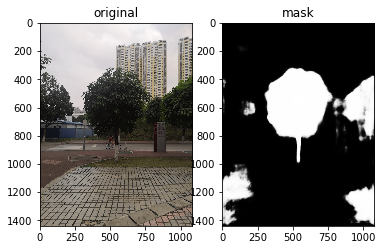

In [26]:
t3=time.time()
with torch.no_grad():
  images = images.cuda()
  depth = depth.cuda()  
  output = model(images,depth)#input shape应该是[1, 3, H, W]  [4, 3, 256, 256] batchsize channels height width
  output = torch.sigmoid(output).cpu().numpy()
  # print(output.shape)
  seg_img=(output[0,0,int((config['input_h']-nh)//2):int((config['input_h']-nh)//2+nh), int((config['input_w']-nw)//2):int((config['input_w']-nw)//2+nw)]* 255).astype('uint8')
  # cv2.imwrite('nested_unet_segment.png',seg_img)
  
t4=time.time()
torch.cuda.empty_cache()
seg_img = Image.fromarray(seg_img).resize((orininal_w,orininal_h))
# image = cv2.resize(seg_img,(orininal_w,orininal_h))
# image.save("nestedunetmask.png")
plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(old_img)
plt.title("original")

plt.subplot(1, 2, 2)
plt.imshow(seg_img,cmap='gray')
plt.title("mask")

In [27]:
t4-t3

0.7849364280700684

# 生成点云

In [83]:
cam = joblib.load('mtx.pkl')
def CreatePointCloud(img,depth,scale,depthScale,fileName):
    '''
    img:RGB图
    depth：深度图 类型只能是uint8 uint16 float 若img和depth大小不一样会报错
    scale:img相对于相机获取的原始图像，被放缩的比例
    depthScale:深度图的数值和米的比值
    depthTrunc:大于这个值的深度看做0
    fileName:生成的点云的文件名
    '''
    height, width, _ = img.shape
    fx = cam[0,0]*scale
    fy = cam[1,1]*scale
    cx = cam[0,2]*scale
    cy = cam[1,2]*scale

    #焦距（fx，fy），光学中心（cx，cy）
    # 输入open3d能识别的相机内参，如果用自己的相机，则需要先做内参的转换
    # 存储相机内参和图像高和宽
    cam_o3 = o3d.camera.PinholeCameraIntrinsic(width, height, fx,fy,cx,cy)
    # 生成rgbd图，参数：彩色图，深度图，深度值与尺度的比率（默认为1000，深度值首先被缩放，然后被截断），
    # 深度值大于depth_trunc的值被截断为0，是否将RGB图像转换为强度图像

    rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
            o3d.geometry.Image(img), o3d.geometry.Image(depth), 
        depth_scale=depthScale, depth_trunc=round(depth.max()/scale), convert_rgb_to_intensity=False)

    #生成三维点云需要rgbd图和相机内参
    pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, cam_o3)
    pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])#记得翻转它，否则则是倒着的点云
    # 把生成的点云显示出来
    # o3d.visualization.draw_geometries([pcd])
    o3d.io.write_point_cloud(fileName, pcd)
    return pcd


def find_max_region(mask_sel):
    _,contours,hierarchy = cv2.findContours(mask_sel,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    area = []
    for j in range(len(contours)):
        area.append(cv2.contourArea(contours[j]))
    max_idx = np.argmax(area)
    max_area = cv2.contourArea(contours[max_idx])
    for k in range(len(contours)):
        if k != max_idx:
            cv2.fillPoly(mask_sel, [contours[k]], 0)
    return mask_sel

def display_inlier_outlier(cloud, ind):
    inlier_cloud = cloud.select_by_index(ind)
    outlier_cloud = cloud.select_by_index(ind, invert=True) # 设置为True表示保存ind之外的点
#     outlier_cloud.paint_uniform_color([0, 1, 0])
#     inlier_cloud.paint_uniform_color([1, 0, 0])
    # o3d.visualization.draw_geometries([inlier_cloud],width=600,height=600)
    return inlier_cloud

def radius_outlier_removal(tree_cloud,minpoints,ball_radius):
    print("Radius oulier removal")
    cl, ind = tree_cloud.remove_radius_outlier(nb_points=minpoints, radius=ball_radius)#nb_points：球体中最少点的数量 radius球的半径
    radius_cloud = tree_cloud.select_by_index(ind)
    # o3d.visualization.draw_geometries([radius_cloud], window_name="半径滤波",
    #                                   width=700, height=700,
    #                                   left=50, top=50,
    #                                   mesh_show_back_face=False)
    return radius_cloud

def get_avg_distance(cloud,k):
    '''
    cloud：点云
    k：用来计算平均距离的k个最近邻居
    '''
    point = np.asarray(cloud.points)  # 获取点坐标
    kdtree = o3d.geometry.KDTreeFlann(cloud)  # 建立KD树索引
    point_size = point.shape[0]  # 获取点的个数
    dd = np.zeros(point_size)
    for i in range(point_size):
        [_, idx, dis] = kdtree.search_knn_vector_3d(point[i], k+1)
        dd[i] = np.mean(np.sqrt(dis[1:]))  # 获取到k个最近邻点的平均距离 第1个为到自己的距离
    return dd

def delete_given_points(cloud, ind):
    inlier_cloud = cloud.select_by_index(ind, invert=True)
    outlier_cloud = cloud.select_by_index(ind) # 设置为True表示保存ind之外的点
    outlier_cloud.paint_uniform_color([0, 1, 0])
#     inlier_cloud.paint_uniform_color([1, 0, 0])
    o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud],width=600,height=600)
    return inlier_cloud

def stat_outlier_removal(radius_cloud,neighbors,std_threshold):
    print("Statistical oulier removal")
    # nb_neighbors:用于指定计算平均距离的邻域点的数量。
    # std_ratio:基于点云的平均距离的标准差来设置阈值。阈值越小，滤波效果越明显。
    cl, ind = radius_cloud.remove_statistical_outlier(nb_neighbors=neighbors,
                                             std_ratio=std_threshold)
    sor_cloud = radius_cloud.select_by_index(ind)
    o3d.visualization.draw_geometries([sor_cloud], window_name="统计滤波",
                                      width=700, height=700,
                                      left=50, top=50,
                                      mesh_show_back_face=False)
    return sor_cloud

def aabb(cloud):
    aabb = cloud.get_axis_aligned_bounding_box()
    aabb.color = (1, 0, 0)  # aabb包围盒为红色

    # [center_x, center_y, center_z] = aabb.get_center()
    # print("aabb包围盒的中心坐标为：\n", [center_x, center_y, center_z])

    # vertex_set = np.asarray(aabb.get_box_points())
    # print("obb包围盒的顶点为：\n", vertex_set)

    aabb_box_length = np.asarray(aabb.get_extent()) #x y z
    # print("aabb包围盒的边长为：\n", aabb_box_length)

    # half_extent = np.asarray(aabb.get_half_extent())
    # print("aabb包围盒边长的一半为：\n", half_extent)

    # max_bound = np.asarray(aabb.get_max_bound())
    # print("aabb包围盒边长的最大值为：\n", max_bound)

    # max_extent = np.asarray(aabb.get_max_extent())
    # print("aabb包围盒边长的最大范围，即X, Y和Z轴的最大值：\n", max_extent)

    # min_bound = np.asarray(aabb.get_min_bound())
    # print("aabb包围盒边长的最小值为：\n", min_bound)

    # o3d.visualization.draw_geometries([cloud, aabb], window_name="AABB包围盒",
    #                                   width=1024, height=768,
    #                                   left=50, top=50,
    #                                   mesh_show_back_face=False)
    
    return aabb_box_length




In [29]:
H=120
W=160
scale = 160/4608 #RGB除以手机相机实际尺寸

In [30]:
timestamp='1681878785271'
model_type="MiDaS" #MiDaS DPT_Hybrid
output_path=model_type+"_output"

In [31]:
input_path="input"
depthData = np.fromfile(os.path.join(input_path,timestamp+'_depthdata.txt'), dtype = np.uint16) 
depthData=depthData.reshape(H,W)
depthData = cv2.rotate(depthData, cv2.ROTATE_90_CLOCKWISE)

cameraImage=cv2.imread(os.path.join(input_path,timestamp+'.jpg'), cv2.COLOR_BGR2RGB)
img=cv2.resize(cameraImage,(H,W))

rawdepthData = np.fromfile(os.path.join(input_path,timestamp+'_rawdepthdata.txt'), dtype = np.uint16) 
rawdepthData=rawdepthData.reshape(H,W)
rawdepthData = cv2.rotate(rawdepthData, cv2.ROTATE_90_CLOCKWISE)

ConfidenceData = np.fromfile(os.path.join(input_path,timestamp+'_confidencedata.txt'), dtype = np.uint8) 
ConfidenceData=ConfidenceData.reshape(H,W)
ConfidenceData = cv2.rotate(ConfidenceData, cv2.ROTATE_90_CLOCKWISE)

newDepthData=depthData.copy()
cnt=0
for i in range(W):
    for j in range(H):
        if rawdepthData[i,j]>0 and ConfidenceData[i,j]>155:
            cnt+=1
            newDepthData[i,j]=rawdepthData[i,j]
print('替换了',cnt,'个像素')

替换了 507 个像素


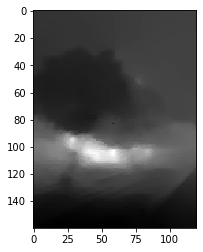

In [33]:
plt.imshow(newDepthData,cmap="gray")

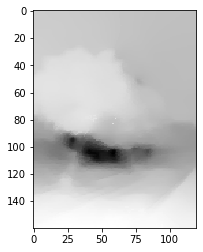

In [34]:
inverse=65535-newDepthData
plt.imshow(inverse,cmap="gray")

In [37]:
level=1
pred_depth=cv2.imread(os.path.join(output_path,timestamp+'.png'), cv2.IMREAD_GRAYSCALE)
pred_depth=cv2.resize(pred_depth,(H,W))#120 160

t5=time.time()
pred_depth_aligned = Rel2Abs(pred_depth,newDepthData,level)
t6=time.time()

In [39]:
(t6-t5)*1000

0.9975433349609375

In [10]:
newDepthData1=newDepthData.copy().flatten()
pred_depth_aligned1=pred_depth_aligned.copy().flatten()

In [11]:
X=[i for i in range(newDepthData1.shape[0])]

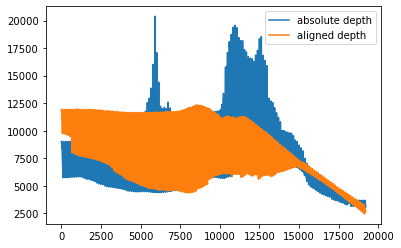

In [12]:
plt.figure()
plt.plot(X,newDepthData1,label="absolute depth")
plt.plot(X,pred_depth_aligned1,label="aligned depth")
plt.legend(loc = "best")#图例
plt.show()

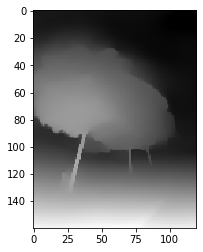

In [36]:
plt.imshow(pred_depth,cmap="gray")

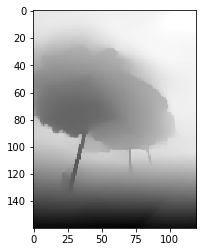

In [37]:
plt.imshow(pred_depth_aligned,cmap="gray")

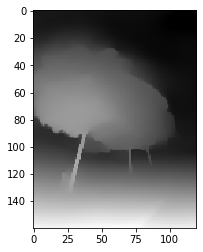

In [38]:
ali_inverse=65535-pred_depth_aligned
plt.figure()
plt.imshow(ali_inverse,cmap="gray")

In [40]:
img=cv2.imread('input/'+timestamp+'.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image=cv2.resize(img,(H,W))

In [41]:
def format_func(value, tick_number):
    return '{:.1f}'.format(value/1000)

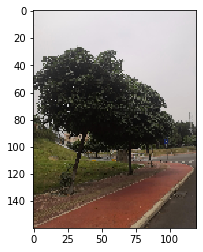

In [41]:
plt.imshow(image)

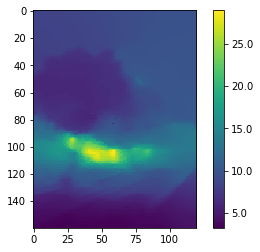

In [42]:
img=plt.imshow(newDepthData)
cbar = plt.colorbar(img)
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

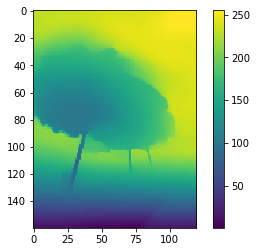

In [43]:
pred_inverse=255-pred_depth
img=plt.imshow(pred_inverse)
cbar = plt.colorbar(img)

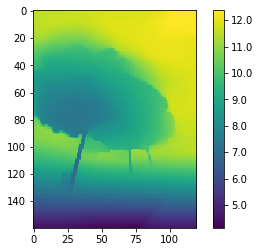

In [44]:
img=plt.imshow(pred_depth_aligned)
cbar = plt.colorbar(img)
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

In [51]:
depth=pred_depth_aligned.astype('uint16')
t7=time.time()
pred_cloud=CreatePointCloud(image,depth,scale,1000,model_type+'_Depth.ply')
t8=time.time()

In [52]:
(t8-t7)*1000

6.98089599609375

In [53]:
# OTSU二值化
# ret2, binary = cv2.threshold(seg_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# 全局阈值
ret, threshold_mask = cv2.threshold(src=np.asarray(seg_img),# 要二值化的图片
        thresh=125,               # 全局阈值
        maxval=255,               # 大于全局阈值后设定的值
        type=cv2.THRESH_BINARY)   # 设定的二值化类型，THRESH_BINARY：表示小于阈值置0，大于阈值置填充色

In [ ]:
kernel = np.ones((3, 3), np.uint8)
threshold_mask = cv2.morphologyEx(threshold_mask, cv2.MORPH_OPEN, kernel, iterations=8)#开运算，先腐蚀后膨胀
# threshold_mask_path=timestamp+'_threshold_mask.png'
# cv2.imwrite(threshold_mask_path,threshold_mask)

In [ ]:
plt.imshow(threshold_mask,cmap='gray')

In [ ]:
contours,hierarchy = cv2.findContours(threshold_mask,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [ ]:
len(contours)

In [ ]:
selected_heights=dict()
total_index=[]
for i in range(len(contours)):
    area=cv2.contourArea(contours[i])
    print("面积=",area)
    if area>0:
        print("-----------计算第",i,"个轮廓-----------------")
        local_mask=threshold_mask.copy()
        for j in range(len(contours)):
            if j!=i:
                cv2.fillPoly(local_mask, [contours[j]], 0)
        if local_mask.max()>0:
            plt.figure()
            plt.imshow(local_mask)
            print("local_mask的最大像素：",local_mask.max())
            resize_mask=Image.fromarray(local_mask).resize((H,W)) #宽度=H=120
            mask_for_seg=np.asarray(resize_mask).flatten()
            print("mask_for_seg的最大像素：",max(mask_for_seg))
            print("mask_for_seg的最小像素：",min(mask_for_seg))
            index=[]
            for k in range(len(mask_for_seg)):
                if mask_for_seg[k]==255:
                    index.append(k)
            print("index的大小：",len(index))
            tree_cloud=display_inlier_outlier(pred_cloud, index)
            cl, ind = tree_cloud.remove_radius_outlier(nb_points=10, radius=0.6)#nb_points：球体中最少点的数量 radius球的半径
            radius_cloud = tree_cloud.select_by_index(ind)
            
            aabb_box_length=aabb(radius_cloud)
            height=aabb_box_length[1]/2.0
            height=round(height,2)
            print("height=",height)
            # print('Y轴长度:',aabb_box_length[1])
            # print('Y轴长度的的一半:',aabb_box_length[1]/2.0)
            if height>1.0:
                selected_heights[i]=height
                for idx in index:
                    total_index.append(idx)

In [ ]:
resize_mask=Image.fromarray(threshold_mask).resize((H,W)) #宽度=H=120
mask_for_seg=np.asarray(resize_mask).flatten()
print("mask_for_seg的最大像素：",max(mask_for_seg))
print("mask_for_seg的最小像素：",min(mask_for_seg))

In [ ]:
img=np.asarray(Image.open(r'DPT_Hybrid_output\5.png'))
print(img[0,0])

In [ ]:
import shutil
import os

In [ ]:
srcpath="MiDaS_input"
dstpath="Adelaidepth_input"
filelist=[1001,1003,1007,1010,1011,1013,1014,
          1015,1016,1020,
          1022,1023,1026,1027,1028,1029,1030,
          1031,1032,1033,1034,1035,1036,1037,
          1038,1040,1045,1048,1049,1054,
          1055,1060,1062,1064,1067,1068,1070]
for file in filelist:
      filename=str(file)+'.png'
      full_path = os.path.join(srcpath, filename)
      despath = os.path.join(dstpath, filename)
      shutil.move(full_path, despath)

In [ ]:
filelist=[1003,1007,1011,1013,1014,
          1015,1020,
          1022,1026,1027,1028,1029,1030,
          1031,1032,1033,1034,1035,1036,1037,
          1038,1040,1045,1054,
          1055,1062,1064,1067,1068,1070]

In [ ]:
list=os.listdir("input")
path="input"
depth_path="new_Ade_output"
list.sort(key=lambda x:int(x.split('.')[0]))
cnt=1001
for file in list:
    form=os.path.splitext(file)[1]
    name=os.path.splitext(file)[0]
    os.rename(os.path.join(path,file),os.path.join(path,str(cnt)+'.png'))
    os.rename(os.path.join(depth_path,file),os.path.join(depth_path,str(cnt)+'.png'))
    cnt+=1

In [ ]:
filelist=os.listdir("Ade_depth")
for file in filelist:
    img=cv2.imread(os.path.join("Ade_depth",file),0)
    convert=255-img
    cv2.imwrite(os.path.join("new_Ade_output",file),convert)

# 重命名图片为连续数字

In [ ]:
path=r"inputs\resized_tree_dataset_960\norm_depth"
filelist=os.listdir(path)
filelist.sort(key=lambda x:int(x.split('.')[0]))

In [ ]:
filelist[280:290]

In [ ]:
cnt=1
for file in filelist:
    form=os.path.splitext(file)[1]
    name=os.path.splitext(file)[0]
    if form=='.png':
        os.rename(os.path.join(path,file),os.path.join(path,str(cnt)+'.png'))
        # if os.path.exists(os.path.join(path,name+'.json')):
        #     os.rename(os.path.join(path,name+'.json'),os.path.join(path,str(cnt)+'.json'))
        cnt+=1


# 测量一张图中的多棵树

In [ ]:
mask=Image.open(r"inputs\tree512\masks\0\213.png")
RGBmask=mask.convert('RGB')
mask=np.asarray(mask)

In [ ]:
plt.imshow(RGBmask)

In [ ]:
contours,hierarchy = cv2.findContours(mask,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [ ]:
colors = [(128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128), (0, 128, 128), 
            (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0), (192, 128, 0), (64, 0, 128), (192, 0, 128), 
            (64, 128, 128), (192, 128, 128), (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128), (128, 64, 12)]

In [ ]:
area = []
for k in range(len(contours)):
    area.append(cv2.contourArea(contours[k]))
# 轮廓索引
max_idx = np.argsort(np.array(area))
new_mask = np.asarray(RGBmask.copy())

for k in range(len(contours)):
    cv2.fillPoly(new_mask, [contours[k]], colors[k])
    # 找到边界坐标
    x, y, w, h = cv2.boundingRect(contours[k])  # 计算点集最外面的矩形边界
    #  print(x, y, w, h)
    # 因为这里面包含了，图像本身那个最大的框，所以用了if，来剔除那个图像本身的值。
    if x != 0 and y != 0 and w != mask.shape[1] and h != mask.shape[0]:
        # 左上角坐标和右下角坐标
        # 如果执行里面的这个画框，就是分别来画的，
        cv2.rectangle(new_mask, (x, y), (x + w, y + h), colors[k], 3)
        # 图片img,“文本内容”,(左下角坐标),字体,字体大小,(颜色)，线条粗细，线条类型
        cv2.putText(new_mask, str(10.00)+'m',(x,y-5) , cv2.FONT_HERSHEY_SIMPLEX, 0.9, colors[k], 2)

plt.imshow(new_mask)

In [ ]:
old_img=Image.open(r"inputs\tree512\images\213.png")

In [ ]:
blend_image = Image.blend(old_img,Image.fromarray(new_mask),0.7)
plt.imshow(blend_image)

In [ ]:
threshold_mask=np.asarray(Image.open(r"1680935847649_threshold_mask.png"))

In [ ]:
contours,hierarchy = cv2.findContours(threshold_mask,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [ ]:
x, y, w, h = cv2.boundingRect(contours[1])
print(x," ",y," ",w," ",h)

In [ ]:
threshold_mask.shape

In [ ]:
plt.imshow(threshold_mask,cmap='gray')

In [ ]:
new_mask=threshold_mask.copy()
for k in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[k])
    if y+h<threshold_mask.shape[1]*5/6:
        cv2.fillPoly(new_mask, [contours[k]], (0,0,0))
    else:
        # 左上角坐标和右下角坐标
        cv2.rectangle(new_mask, (x, y), (x + w, y + h), (255,0,0), 3)
        # 图片img,“文本内容”,(左下角坐标),字体,字体大小,(颜色)，线条粗细，线条类型
        cv2.putText(new_mask, "tree" ,(x,y-10) , cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,0,0), 2)

plt.imshow(new_mask,cmap='gray')

In [ ]:
cv2.imwrite('test.png',new_mask)

# labelme标记后得到的json转图片

In [1]:
import argparse
import base64
import json
import os
import os.path as osp
import warnings

import numpy as np
import PIL.Image
import yaml
from labelme import utils
import cv2

In [89]:
number="1682233947702"
path="input/"+number+".json"
data = json.load(open(path))
imageData=""
if data['imageData']:
    imageData = data['imageData']
else:
    imagePath = os.path.join(os.path.dirname(path), data['imagePath'])
    with open(imagePath, 'rb') as f:
        imageData = f.read()
        imageData = base64.b64encode(imageData).decode('utf-8')
img = utils.img_b64_to_arr(imageData)
label_name_to_value = {'_background_': 0}
for shape in data['shapes']:
    label_name = shape['label']
    if label_name in label_name_to_value:
        label_value = label_name_to_value[label_name]
    else:
        label_value = len(label_name_to_value)
        label_name_to_value[label_name] = label_value

# label_values must be dense
label_values, label_names = [], []
for ln, lv in sorted(label_name_to_value.items(), key=lambda x: x[1]):
    label_values.append(lv)
    label_names.append(ln)
assert label_values == list(range(len(label_values)))

lbl = utils.shapes_to_label(img.shape, data['shapes'], label_name_to_value)
classes = ["_background_","tree"]
new = np.zeros([np.shape(img)[0],np.shape(img)[1]])
for name in label_names:
    index_json = label_names.index(name)
    index_all = classes.index(name)
    new = new + index_all*(np.array(lbl) == index_json)

utils.lblsave(osp.join(r"input", number+'_mask.png'), new)

In [90]:
# 读取灰度图像
img = cv2.imread("input/"+number+"_mask.png", 0)
# 1.全局阈值法
ret, mask_all = cv2.threshold(src=img,# 要二值化的图片
    thresh=37,               # 全局阈值
    maxval=255,               # 大于全局阈值后设定的值
    type=cv2.THRESH_BINARY)   # 设定的二值化类型，THRESH_BINARY：表示小于阈值置0，大于阈值置填充色
cv2.imwrite("input/"+number+"_mask.png",mask_all)

True

# 拟合轮廓求树高

In [105]:
image=np.asarray(Image.open('input/1681878785271_mask.png'))
# image=np.asarray(Image.open('input/1681877490092_mask.png'))
# image=np.asarray(Image.open('input/1681878984711_mask.png'))
# image=np.asarray(Image.open('input/1682143687292_mask.png'))

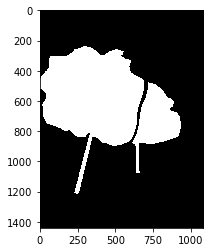

In [106]:
plt.imshow(image,cmap='gray')

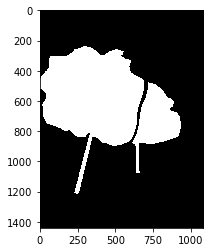

In [112]:
image=Image.open('input/1681878785271_mask.png')
RGBimage=image.convert('RGB')
image=np.array(image)
RGBimage=np.array(RGBimage)
plt.imshow(RGBimage)

In [109]:
image.shape

(1440, 1080, 3)

In [114]:
colors=[(128,0,0),(0,128,0),(0,0,128)]

-----------计算第 0 个轮廓-----------------
-----------计算第 1 个轮廓-----------------
-----------计算第 2 个轮廓-----------------


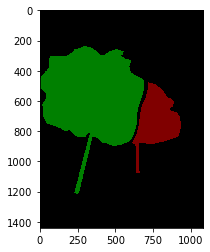

In [115]:
contours,hierarchy = cv2.findContours(image,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
local_mask=RGBimage.copy()
for i in range(len(contours)):
    area=cv2.contourArea(contours[i])
    # print("面积=",area)
    if area>0:
        print("-----------计算第",i,"个轮廓-----------------")
        cv2.fillPoly(local_mask, [contours[i]], colors[i])

plt.imshow(local_mask)

-----------计算第 0 个轮廓-----------------
-----------计算第 1 个轮廓-----------------


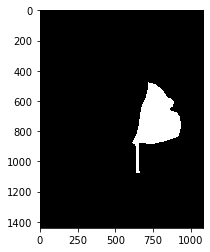

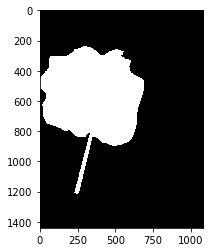

In [50]:
contours,hierarchy = cv2.findContours(image,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
for i in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[i])
    if y+h<image.shape[1]*5/6:
        continue
    area=cv2.contourArea(contours[i])
    # print("面积=",area)
    if area>0:
        print("-----------计算第",i,"个轮廓-----------------")
        local_mask=image.copy()
        for j in range(len(contours)):
            if j!=i:
                cv2.fillPoly(local_mask, [contours[j]], 0)
        plt.figure()
        plt.imshow(local_mask,cmap='gray')
        newimage=Image.fromarray(local_mask)
        newimage.save('contour'+str(i)+'.png')

In [2]:
def cart2pol(x, y):  #笛卡尔坐标系->极坐标系
    theta = np.arctan2(y, x)#求夹角
    rho = np.hypot(x, y)#求斜边长度，即半径
    return theta, rho
def pol2cart(theta, rho):  #极坐标系->笛卡尔坐标系
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y
def rotate_contour(cnt, rotatepoint, angle):  #轮廓旋转函数
    cx = rotatepoint[0]
    cy = rotatepoint[1]
    cnt_norm = cnt - [cx, cy]  #将轮廓移动到旋转点
    coordinates = cnt_norm[:, 0, :]#找到x=0的点
    xs, ys = coordinates[:, 0], coordinates[:, 1]#起点
    thetas, rhos = cart2pol(xs, ys)#起点转换成极坐标形式
    thetas = np.rad2deg(thetas)#弧度转角度
    thetas = (thetas + angle) % 360 #最终旋转角
    thetas = np.deg2rad(thetas)#转回幅度
    xs, ys = pol2cart(thetas, rhos)#起点转换回笛卡尔坐标系
    cnt_norm[:, 0, 0] = xs
    cnt_norm[:, 0, 1] = ys
    cnt_rotated = cnt_norm + [cx, cy] #轮廓平移回原来的位置
    cnt_rotated = cnt_rotated.astype(np.int32)
    return cnt_rotated

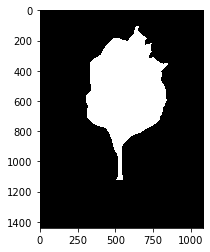

In [11]:
# im=Image.open('contour1.png')
im=Image.open('input/1681450250750_mask.png')
# im=im.transpose(Image.FLIP_LEFT_RIGHT)
mask=np.asarray(im)
plt.imshow(mask,cmap='gray')

In [12]:
contours,hierarchy = cv2.findContours(mask,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
y_size=np.shape(mask)[0]#高
print("y_size=",y_size)
x_size=np.shape(mask)[1]#宽
print("x_size=",x_size)
x,y,w,h=cv2.boundingRect(contours[0]) #提取外接矩形
print("x轴范围:(",x,",",(x+w),")")
print("y轴范围:(",y,",",(y+h),")")

y_size= 1440
x_size= 1080
x轴范围:( 301 , 846 )
y轴范围:( 102 , 1127 )


In [13]:
length=0
max_width_diff=0
max_width_idx=y+h
#从下往上扫描
for row in range(y+h, y, -1):
    now_len=0
    x1=0
    x2=0
    for col in range(x,x+w):
        if(mask[row][col] == 255):
            x1=col
            break
    for col in range(x+w,x1,-1):
        if col==x_size:
            col-=1
        if(mask[row][col] == 255):
            x2=col
            break
    if x1==0 or x2==0:
        continue
    # print("x1=",x1," x2=",x2)
    now_len=x2-x1
    if now_len>20 and length != 0:
        width_diff=now_len-length
        if width_diff>max_width_diff:
            max_width_diff=width_diff
            max_width_idx=row
        if max_width_diff>30:
            max_width_idx+=2
            break
    if now_len>20:
       length=now_len

print("分界处:",max_width_idx)

分界处: 777


### 画出区分出的树冠和树干

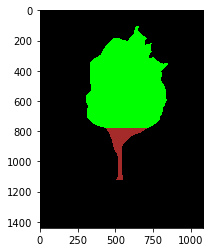

In [14]:
tempmask=mask.copy()
rgb_img = cv2.cvtColor(tempmask, cv2.COLOR_GRAY2RGB)
for row in range(y,max_width_idx+1):
    for col in range(x,x+w):
        if tempmask[row][col]==255:
            rgb_img[row][col]=(0,255,0)
for row in range(max_width_idx+1,y+h):
    for col in range(x,x+w):
        if tempmask[row][col]==255:
            rgb_img[row][col]=(165, 42, 42)
plt.imshow(rgb_img)

In [26]:
rgb_img=Image.fromarray(rgb_img)
rgb_img.save('contour0_rgb.png')

### 树干部分

In [56]:
def find_max_region(mask_sel):
    contours,hierarchy = cv2.findContours(mask_sel,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    area = []
    for j in range(len(contours)):
        area.append(cv2.contourArea(contours[j]))
    max_idx = np.argmax(area)
    max_area = cv2.contourArea(contours[max_idx])
    for k in range(len(contours)):
        if k != max_idx:
            cv2.fillPoly(mask_sel, [contours[k]], 0)
    return mask_sel

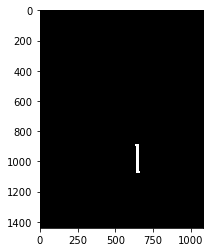

In [78]:
trunkmask=mask.copy()
for row in range(y,max_width_idx):
    for col in range(x,x+w):
        if trunkmask[row][col]==255:
            trunkmask[row][col]=0
trunkmask=find_max_region(trunkmask)
plt.imshow(trunkmask,cmap='gray')

In [79]:
trunk_contours,hierarchy = cv2.findContours(trunkmask,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [80]:
len(trunk_contours)

1

In [235]:
trunkImg=Image.fromarray(trunkmask)
trunkImg.save('trunk.jpg')

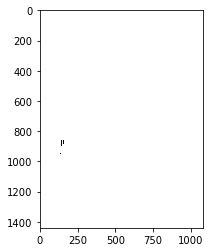

In [28]:
whitebg = np.ones((y_size,x_size,3), np.uint8) * 255
cv2.drawContours(whitebg, trunk_contours[0], -1, (0,0,0), 2)
plt.imshow(whitebg)

In [142]:
im=Image.fromarray(whitebg)
im.save('tree_trunk.png')

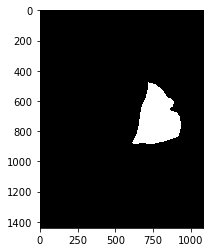

In [81]:
crownmask=mask.copy()
for row in range(max_width_idx,y+h):
    for col in range(x,x+w):
        if crownmask[row][col]==255:
            crownmask[row][col]=0
plt.imshow(crownmask,cmap='gray')

In [108]:
crownImg=Image.fromarray(crownmask)
crownImg.save('crown.jpg')

In [82]:
crown_contours,hierarchy = cv2.findContours(crownmask,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [145]:
whitebg = np.ones((y_size,x_size,3), np.uint8) * 255
cv2.drawContours(whitebg, crown_contours[0], -1, (0,0,0), 2)
im=Image.fromarray(whitebg)
im.save('tree_crown.png')

In [147]:
whitebg = np.ones((y_size,x_size,3), np.uint8) * 255
cv2.drawContours(whitebg, crown_contours[0], -1, (0,255,0), 2)
cv2.drawContours(whitebg, trunk_contours[0], -1, (165, 42, 42), 2)
im=Image.fromarray(whitebg)
im.save('tree_split.png')

In [60]:
# 进行椭圆拟合
# tempmask=crownmask.copy()
# rgb_img = cv2.cvtColor(tempmask, cv2.COLOR_GRAY2RGB)
# ellip = cv2.fitEllipse(crown_contours[0])  #椭圆拟合,减少噪声的影响  //contours:轮廓点集合
# elli=cv2.ellipse(rgb_img,ellip,(255,0,0),2)
# plt.imshow(elli)

In [83]:
c_x,c_y,c_w,c_h=cv2.boundingRect(crown_contours[0]) #提取外接矩形
print("x轴范围:(",c_x,",",(c_x+c_w),")")
print("y轴范围:(",c_y,",",(c_y+c_h),")")

x轴范围:( 608 , 930 )
y轴范围:( 476 , 885 )


### 拟合树干部分

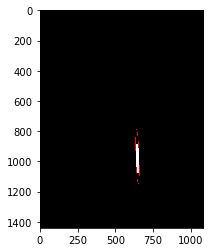

In [84]:
#Step1 对轮廓P上的点进行椭圆拟合，记录椭圆中心坐标rotatepoint和椭圆旋转的角度rotateangel;
tempmask=trunkmask.copy()
rgb_img = cv2.cvtColor(tempmask, cv2.COLOR_GRAY2RGB)
ellip = cv2.fitEllipse(trunk_contours[0])  #椭圆拟合,减少噪声的影响  //contours:轮廓点集合
rotatepoint = ellip[0]  #(x, y)
rotateangel = 180-ellip[2] #angle表示短轴与x轴的夹角 顺时针旋转为正
if rotateangel>90:
    rotateangel-=180
elli=cv2.ellipse(rgb_img,ellip,(255,0,0),2)
plt.imshow(elli)

In [112]:
im=Image.fromarray(rgb_img)
im.save('trunk_rec.png')

In [150]:
whitebg = np.ones((y_size,x_size,3), np.uint8) * 255
cv2.drawContours(whitebg, trunk_contours[0], -1, (0,0,0), 2)
whitebg =cv2.ellipse(whitebg,ellip,(255,0,0),2)
im=Image.fromarray(whitebg)
im.save('trunk_fit.png')

In [63]:
rotateangel

-14.128721237182617

In [64]:
rotatepoint

(270.7213439941406, 1087.5904541015625)

In [85]:
intpoint=(int(round(rotatepoint[0],0)),int(round(rotatepoint[1],0)))

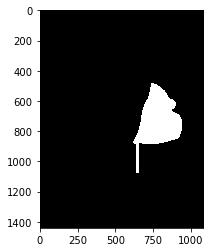

In [86]:
#Step2 以rotatepoint为旋转中心将轮廓P逆时针旋转180-rotateangel度，记新轮廓为rota
rota = rotate_contour(contours[0], rotatepoint, rotateangel)#轮廓旋转函数
blackbg = np.zeros((1440, 1080, 3), dtype=np.uint8)
cv2.fillPoly(blackbg, [rota], (255,255,255))
plt.imshow(blackbg,cmap='gray')

In [87]:
isObscured=True
thresh=(y+max_width_idx)//2
thresh=(y+thresh)//2
for row in range(c_y,thresh):
    if blackbg[row,intpoint[0]].max()==255:
        print('树冠最高点未被遮挡')
        isObscured=False
        break

isFinish=False
isRightShow=False
if isObscured==True:
    print('树冠最高点被遮挡')
    for row in range(c_y,thresh):
        for col in range(c_x,c_x+c_w):
            if blackbg[row,col].max()==255:
                print('找到可观测最高点')
                if col<intpoint[0]:
                    print('露出的是左侧树冠')
                else:
                    print('露出的是右侧树冠')
                    isRightShow=True
                isFinish=True
                break
        if isFinish==True:
            break

树冠最高点被遮挡
找到可观测最高点
露出的是右侧树冠


In [88]:
# 画一条指定斜率的直线
point1 = (intpoint[0],y+h+1)
point2 = (intpoint[0],y-1)
cv2.line(blackbg, point1, point2, (255,0, 0), 2)  # 画直线

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

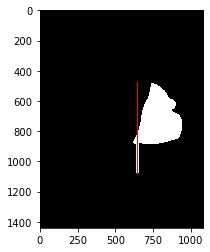

In [89]:
plt.imshow(blackbg,cmap='gray')

In [241]:
img=Image.fromarray(blackbg)
img.save('rotate_tree.png')

In [157]:
whitebg = np.ones((y_size,x_size,3), np.uint8) * 255
cv2.drawContours(whitebg, [rota], -1, (0,0,0), 2)
cv2.line(whitebg, point1, point2, (255,0, 0), 2)  # 画直线
im=Image.fromarray(whitebg)
im.save('tree_line.png')

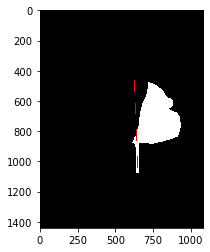

In [90]:
rota_reverse = rotate_contour(rota, rotatepoint, -rotateangel)
blackbg = np.zeros((1440, 1080, 3), dtype=np.uint8)
cv2.fillPoly(blackbg, [rota_reverse], (255,255,255))
line_point=np.array([[[intpoint[0],y+h+1]], [[intpoint[0],y-50]]])
line_reverse=rotate_contour(line_point, rotatepoint, -rotateangel)
line_reverse=line_reverse.reshape(2, 2)
cv2.line(blackbg,(line_reverse[0][0],line_reverse[0][1]),(line_reverse[1][0],line_reverse[1][1]), (255,0, 0), 2)  # 画直线
plt.imshow(blackbg)

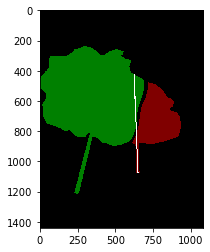

In [129]:
local_mask1=local_mask.copy()
cv2.line(local_mask1,(line_reverse[0][0],line_reverse[0][1]),(line_reverse[1][0],line_reverse[1][1]), (255,255,255), 5)  # 画直线
plt.imshow(local_mask1)

In [91]:
split_x=0
if line_reverse[0,1]<line_reverse[1,1]:
    split_x=line_reverse[0,0]
else:
    split_x=line_reverse[1,0]

In [120]:
im=Image.fromarray(blackbg)
im.save('recover_line_contour.png')

In [247]:
whitebg = np.ones((y_size,x_size,3), np.uint8) * 255
cv2.drawContours(whitebg, [rota_reverse], -1, (0,0,0), 2)
cv2.line(whitebg,(line_reverse[0][0],line_reverse[0][1]),(line_reverse[1][0],line_reverse[1][1]), (255,0, 0), 2)
im=Image.fromarray(whitebg)
im.save('tree_line_reverse.png')

### 找到待拟合的树冠部分

In [92]:
points_x=[]
points_y=[]
isFinish=False
if isRightShow==True:  #露出的是右边树冠，从右往左提取树冠轮廓
    max_col=0
    for row in range(c_y,c_y+c_h):
        for col in range(c_x+c_w,c_x,-1):
            if crownmask[row,col]==255:
                if col>=max_col:
                    points_x.append(col)
                    points_y.append(row)
                    max_col=col
                else:
                    isFinish=True
                break
        if isFinish==True or len(points_x)==10:
            break
else:       #露出的是左边树冠，从左往右提取树冠轮廓
    min_col=c_x+c_w+1
    for row in range(c_y,c_y+c_h):
        for col in range(c_x,c_x+c_w):
            if crownmask[row,col]==255:
                if col<=min_col:
                    points_x.append(col)
                    points_y.append(row)
                    min_col=col
                else:
                    isFinish=True
                break
        if isFinish==True or len(points_x)==10:
            break

### 拟合提取出的树冠

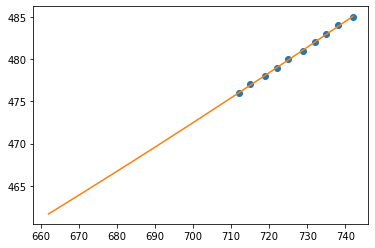

In [93]:
p = np.poly1d(np.polyfit(points_x,points_y, 2))
if isRightShow:
    t = np.linspace(np.asarray(points_x).min()-50,np.asarray(points_x).max())
else:
    t = np.linspace(np.asarray(points_x).min(),np.asarray(points_x).max()+10)
plt.plot(points_x,points_y, 'o', t, p(t), '-')
# 显示图表
plt.show()

In [94]:
line_x=[line_reverse[0,0],line_reverse[1,0]]
line_y=[line_reverse[0,1],line_reverse[1,1]]

In [95]:
f = np.poly1d(np.polyfit(line_x,line_y, 1))

### 找和树干中心线的交点

In [250]:
# if isRightShow:
#     axis_x = np.linspace(intpoint[0]-100,np.asarray(points_x).max())
#     plt.plot(axis_x,p(axis_x))
#     plt.plot(axis_x,f(axis_x))
# else:
#     axis_x = np.linspace(np.asarray(points_x).min(),intpoint[0]+100)
#     plt.plot(axis_x,p(axis_x))
#     plt.plot(axis_x,f(axis_x))

In [96]:
elli_x=[]
elli_y=[]
if isRightShow:
    for i in range(split_x-10,np.asarray(points_x).max()):
        elli_x.append(i)
    for i in elli_x:
        elli_y.append(int(round(p(i),0)))
else:
    for i in range(np.asarray(points_x).min(),split_x+10):
        elli_x.append(i)
    for i in elli_x:
        elli_y.append(int(round(p(i),0)))

In [97]:
color = (255, 0, 0) 
radius = 2
thickness = -1  # -1 表示填充整个圆
for i in range(len(elli_x)):
    cv2.circle(blackbg, (elli_x[i], elli_y[i]), radius, color, thickness)

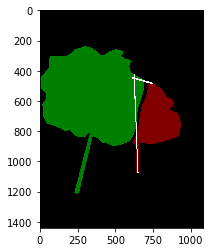

In [130]:
local_mask2=local_mask1.copy()
color = (255, 255, 255) 
radius = 5
thickness = -1  # -1 表示填充整个圆
for i in range(len(elli_x)):
    cv2.circle(local_mask2, (elli_x[i], elli_y[i]), radius, color, thickness)

plt.imshow(local_mask2)

In [131]:
local=Image.fromarray(local_mask2)
local.save('RGB_fit.png')

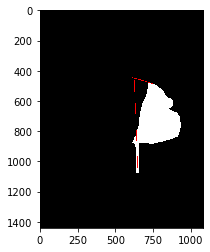

In [98]:
plt.imshow(blackbg)

In [131]:
im=Image.fromarray(blackbg)
im.save('fit_crown.png')

In [215]:
for i in range(len(elli_x)):
    cv2.circle(whitebg, (elli_x[i], elli_y[i]), radius, color, thickness)
im=Image.fromarray(whitebg)
im.save('tree_fit.png')

NameError: name 'whitebg' is not defined

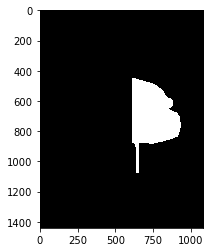

In [99]:
blackbg = np.zeros((1440, 1080), dtype=np.uint8)
cv2.fillPoly(blackbg, [rota_reverse], 255)
for i in range(len(elli_x)):
    blackbg[elli_y[i],elli_x[i]]=255
    # print(elli_y[i],',',elli_x[i])
    for row in range(elli_y[i]+1,c_y+c_h):
        if blackbg[row,elli_x[i]]==255:
            # print('遇到白色像素',row,',',elli_x[i])
            break
        blackbg[row,elli_x[i]]=255

plt.imshow(blackbg,cmap='gray')

In [46]:
im=Image.fromarray(blackbg)
im.save('fill_crown.png')

In [100]:
fit_contours,hierarchy = cv2.findContours(blackbg,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [257]:
len(fit_contours)

2

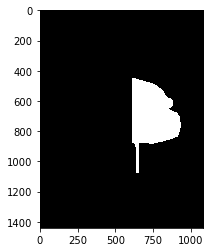

In [101]:
temp=blackbg.copy()
cv2.fillPoly(temp, [fit_contours[0]], 255)
plt.imshow(temp,cmap='gray')

In [172]:
whitebg = np.ones((y_size,x_size,3), np.uint8) * 255
cv2.drawContours(whitebg, fit_contours[0], -1, (0,0,0), 2)
im=Image.fromarray(whitebg)
im.save('new_tree_contour.png')

In [68]:
o3d.visualization.draw_geometries([pred_cloud],width=600,height=600)

In [63]:
def display_inlier_outlier(cloud, ind):
    inlier_cloud = cloud.select_by_index(ind)
    outlier_cloud = cloud.select_by_index(ind, invert=True) # 设置为True表示保存ind之外的点
#     outlier_cloud.paint_uniform_color([0, 1, 0])
#     inlier_cloud.paint_uniform_color([1, 0, 0])
    # o3d.visualization.draw_geometries([inlier_cloud],width=600,height=600)
    return inlier_cloud

In [70]:
H=120
W=160

In [58]:
resize_mask=Image.open('1681450501264_threshold_mask.png')
mask_for_seg=np.asarray(resize_mask)

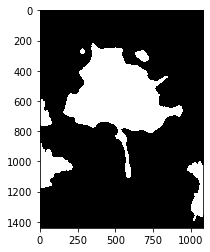

In [59]:
plt.imshow(mask_for_seg,cmap='gray')

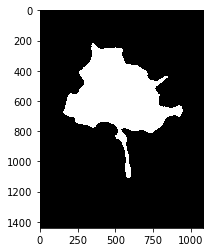

In [60]:
temp=find_max_region(mask_for_seg)
plt.imshow(temp,cmap='gray')

In [61]:
cv2.imwrite('temp.png',temp)

True

In [61]:
resize_mask=Image.fromarray(mask).resize((H,W)) #无遮挡
# resize_mask=Image.fromarray(temp).resize((H,W)) #有遮挡
mask_for_seg=np.asarray(resize_mask).flatten()
index=[]
for k in range(len(mask_for_seg)):
    if mask_for_seg[k]==255:
        index.append(k)

In [62]:
len(index)

4048

In [68]:
tree_cloud=display_inlier_outlier(pred_cloud,index)

In [92]:
t2-t1

0.0

In [81]:
t1=time.time()
radius_cloud =radius_outlier_removal(tree_cloud,10,0.4)
t2=time.time()

Radius oulier removal


In [127]:
o3d.io.write_point_cloud('tree_cloud.ply', tree_cloud,write_ascii=True)

True

In [91]:
t1=time.time()
aabb(radius_cloud)
t2=time.time()